## Problem
The goal is to predict flight delays between Boston and Chicago and determine the most predictive factors.

## Client
Airline customers obviously don’t enjoy flight delays and would like to avoid them. Customers would be interested in knowing what airline, day of the week, city, weather factors, etc. would contribute to a delay. A customer then might book on certain days, with certain airlines and may consider going to a different airport nearby. A customer who is on a strict time constraint would be much more likely to do this. This could also be helpful from an airlines perspective as they may need to focus more attention on reducing delays under certain conditions. An airline may want to adjust their flight schedule during certain months to ensure that they are arriving on time. 

## Dataset
In order to solve this problem, I used a 2015 flight delays and cancellations dataset from the Department of Transportation.  This data was provided on Kaggle in csv format and contains over 5 million rows.  I also included weather data in my analysis from NOAA's National Centers for Environmental Information (NCEI). The dataset was in csv format and contained daily weather summaries for Boston and Chicago during 2015. 

## Cleaning 
**Kaggle provided a csv of flights from 2015. Took the following steps after reading it:**
* Combined flights.MONTH and flights.DAY columns into one datetime object. 
* Selected flights that were from Boston to Chicago and Chicago to Boston. 
* Dropped all rows that were missing a value in flights.ARRIVAL_DELAY. 
* Deleted any unnecessary columns such as cancellations.

**The NOAA provided daily weather data for Boston and Chicago in a csv file. Took the following steps after reading it:**
* Converted weather.DATE column to datetime in order to merge with flights.
* Created weather.ORIGIN_AIRPORT column in order to merge with flights. 
* Merged flights.csv and weather.csv together on DATE and ORIGIN_AIRPORT.

**Took the following steps after combining the data in one dataframe called flights_w_weather:**
* Verified that all flights were from Boston to Chicago and Chicago to Boston and that they had the correct weather data
* Created a unique identifier to avoid duplicate rows. Kept one instance of each. 
* Identified rows with extreme values of DEPARTURE_DELAY and deleted them.
* Created flights_w_weather.DD_TAG and flights_w_weather.AD_TAG to show arrival and departure delays. If an arrival delay had a value greater than 0, it is considered an arrival delay and tagged 1. Same with departure delays. 
* Created flights_w_weather.DELAY to show delays. If an arrival or departure delay occurred, it is considered a delay and tagged 1. 

## Data Storytelling
**Questions asked:**
* Do arrival and departure delays always occur together? How many delays are there total?
    * No, only 58% have both. In total, there were 6467 delays (50.76%) that occurred between Boston and Chicago in 2015.
* How many airlines fly this route? 
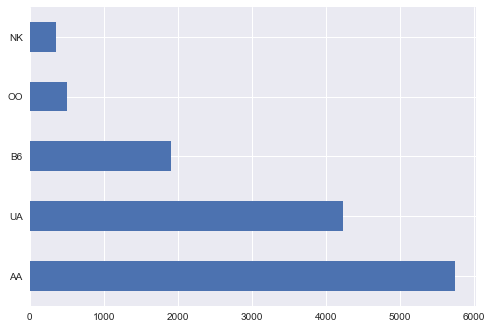
   * There are five airlines that run between Chicago and Boston in this dataset. American Airlines has the highest count of 5744 flights while Spirit Airlines has the lowest count of 352 flights. 
* What are the counts of delay types that were documented? 
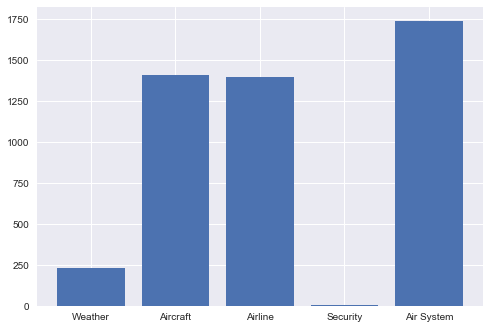
   * Air system has the highest count: 1736 delays while security has the lowest count: 3 delays. I was surprised by the relatively small amount of weather delays: 229. 
* What proportion of flights are delayed by:
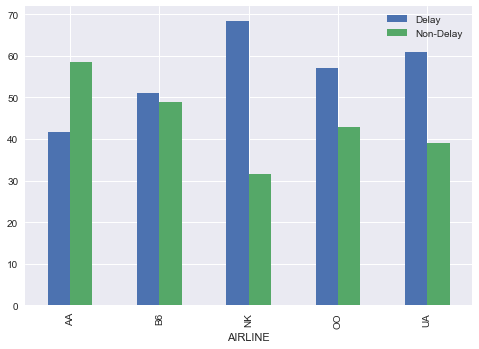
   * Spirit has the highest percentage of delays: 68.47% while American has the lowest percentage of delays: 41.56%.
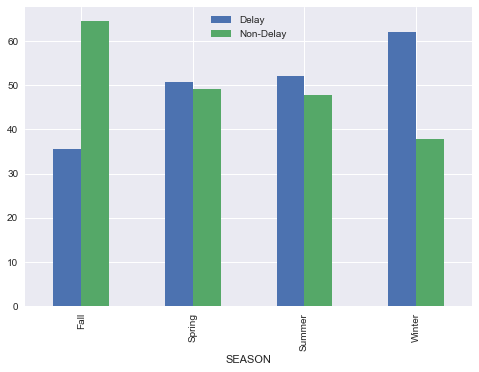
   * Winter has the highest percentage of delays: 62.12% while Fall has the lowest percentage of delays: 35.46%.
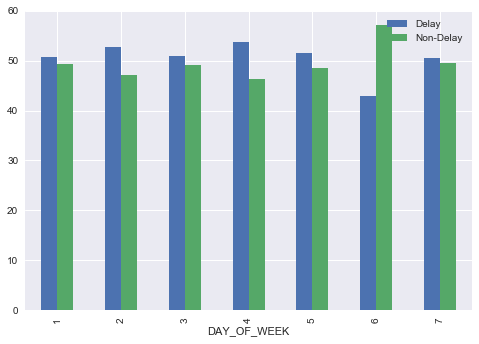
   * Wednesday has the highest percentage of delays: 53.65% while Friday has the lowest percentage of delays: 42.95%.

## Hypothesis Tests
* 2 proportions ztest to test hypothesis that United Airlines has a higher proportion of delays than American Airlines. I compared American and United because they have a similar sample size. 
    * P-value of 0, rejected null hypothesis that proportion of delays is the same between American and United. 95% confident that the difference in proportions is between (-.232 and -.155). Can conclude that United has more delays. 
* 2 proportions ztest to test hypothesis that Friday flights have a smaller proportion of delays than Saturday flights. I compared Friday and Saturday because I felt it was a common decision people make. For example, a customer may be going on vacation for the weekend and want to take off Friday.
    * P-value of 0, reject null hypothesis that proportion of delays is the same between Friday and Saturday. 95% confident that the difference in proportions is between -.15 and -.006. Can conclude that Friday has less delays.
* 2 proportions ztest to test hypothesis that winter has a higher proportion of delays than any other season. 
    * Summer: P-value close to 0, reject null hypothesis that proportion of delays is the same between summer and winter. 95% confident that the difference in proportions is between .052 and .148. Can conclude that Winter has more.
    * Fall: P-value close to 0, reject null hypothesis that proportion of delays is the same between winter and fall. 95% confident that the difference in proportions is between .21 and .31. Can conclude that Winter has more. 
    * Spring: P-value close to 0, reject null hypothesis that proportion of delays is the same between winter and spring. 95% confident that the difference in proportions is between .06 and .16. Can conclude Winter has more.
    * Conclusion: Winter does have a higher proportion of delays. There is a similar difference in proportions for Spring and Summer, but Fall has the highest difference in proportion from winter. 
* 2 proportions ztest to test hypothesis that O’hare and Logan have a different proportion of delays. 
    * P-value low enough to reject null hypothesis. There is a slight difference in proportion of delays but it is hard to know which will have more. More likely that O’hare will have more as confidence interval is (-.01 to .05). 

## Machine Learning 

### Data Prep
First, I normalized PRCP, SNOW, and AWND. Second, I redefined the dataframe flights_w_weather as dflogit_1. Third, I created dummy variables for DAY_OF_WEEK, SEASON, AIRLINE, ORIGIN_AIRPORT, and DESTINATION_AIRPORT. 

### Logistic Regression

* Accuracy Score: 61% 
* Confusion Matrix Results:
    * True Positive: 1010 were delays and predicted correctly
    * True Negative: 938 were not delays and predicted correctly 
    * False Positive: 634 were not delays and predicted incorrectly
    * False Negative: 603 were delays and predicted incorrectly  
* Coefficients:
    * SNOW is the most influential feature. PRCP is 2nd most influential. 
    * Weekday coefficients: Wednesday, Thursday, Saturday, Monday all contribute to a higher likelihood of delay than Tuesday. Friday and Saturday all contribute to a lower likelihood of delay.
    * Airline Coefficients: Spirit Airlines appears to have the lowest contribution to a delay. B6, AA, UA, and OO are all negative. 
    * Season Coefficients: Fall appears to have the lowest contribution to a delay. Winter, Spring, and Summer are all positive. 
    * Airport Coefficients: Boston appears to have a higher contribution to delay than Chicago.
* AUC: .65
* ROC CURVE
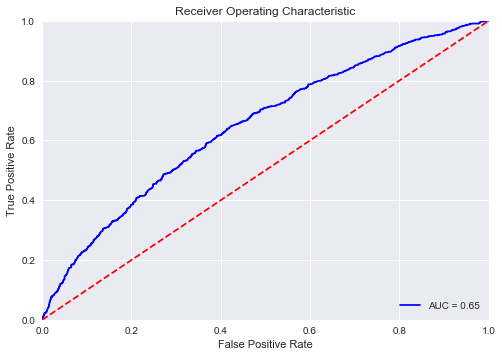

### Random Forest 
* Accuracy Score: 64% 
* Confusion Matrix Results:
    * True Positive: 1085 were delays and predicted correctly
    * True Negative: 942 were not delays and predicted correctly 
    * False Positive: 599 were not delays and predicted incorrectly
    * False Negative: 559 were delays and predicted incorrectly 
* Coefficients:
    * PRCP is the most important feature. AWND is 2nd most important. 
* AUC: .68
* ROC CURVE
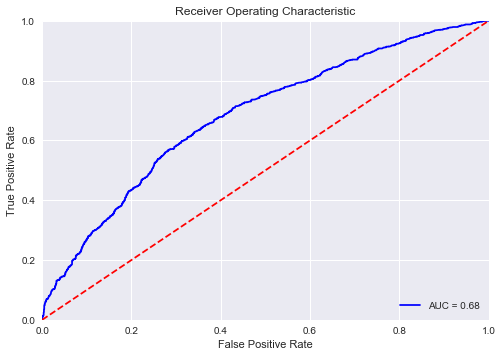

### KNN
* Accuracy Score: 61% 
* Confusion Matrix Results:
    * True Positive: 950 were delays and predicted correctly
    * True Negative: 979 were not delays and predicted correctly 
    * False Positive: 562 were not delays and predicted incorrectly
    * False Negative:  694 were delays and predicted incorrectly
* AUC: .64
* ROC CURVE
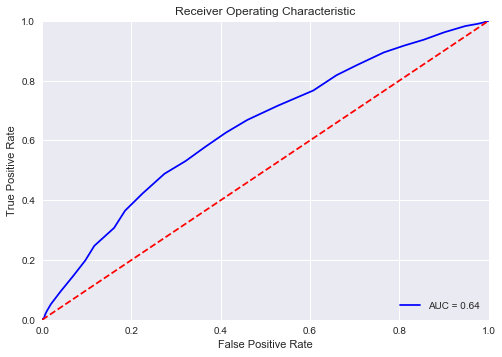

## Conclusion 

### Model Selection
* Random Forest Classifier provides the highest AUC score of .68. This is fairly low, but I would choose it over KNN and Logistic Regression. The main concern for all the models is the type 1 and type 2 errors. There were 599 type 1 errors and 559 type 2 errors using Random Forest. These are both important errors to consider. A type 1 error could result in a customer missing their flight because they gave themselves more time when they shouldn't have. A type 2 error could result in a customer being late to an important meeting that same day as they wouldn't have given themselves enough time to travel. I think it is obvious that one shouldn't rely on these models entirely, but there are some useful insights. 
### Recommendations 
* As most people would suspect: snow, precipitation and wind are important factors in determining a delay. These factors are often more severe in the winter time and thus it would make sense that winter caused the most delays of any season. When booking flights in the winter time, customers should keep this in mind and should give themselves more time to travel. 
* American Airlines caused the least delays and it seems that if you are on a time crunch traveling between Chicago and Boston, it would be a smarter choice than United. 
* If leaving on a weekend, Friday would be a smarter choice than Saturday. 
### Next Steps
* I would like to utilize the rest of the dataset to get a deeper understanding of the best airlines and airports when under a time crunch. For example, if a customer had an interview in New York and was flying from the Cleveland area, should they fly out of Akron/Canton or Cleveland? Should they fly to JFK or Laguardia? I would also go back and analyze time of day to get a deeper understanding of the impact of timing on delays. Should my flight be at 6am or 1pm?
* I would then feed flight information to the model and inform travel decisions. 
